# Introduction to perceptron learning

The perceptron was introduced in the 1950ies and represents a first, simple learning architecture with quite some limitations. Nevertheless, it's a good start.

In [202]:
# important stuff to import ...

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import random

# Read Sample Training Data 

testdatafile = 'perceptron_testdata_02.csv'

print(os.getcwd() )

#os.chdir("C:\\Users\\reichard\\Downloads\\")  # put your own path here ...

data = pd.read_csv(testdatafile, sep=";")

print(data)

C:\Users\UAI5FE\OneDrive - Bosch Group\00_DHBW\git\T3M40507_Maschinelles_Lernen_und_Computational Intelligence
     x   y  class
0    6   9      0
1   12  11      1
2   12   4      0
3   15  10      1
4    7   4      0
5    7   9      0
6    3   1      0
7   12   2      0
8   15  15      1
9    7   6      0
10  15   6      1
11   1  10      0
12  10   7      0
13   3   6      0
14   0   4      0


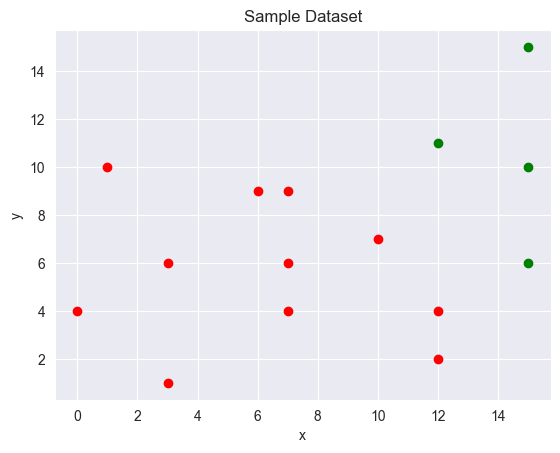

In [203]:
# very simple dataset for first learning experience. let's visualize it anyway ...

pos = (data["class"] == 1)
positives = data[pos]
positives = np.array(positives)

neg = (data["class"] == 0)
negatives = data[neg]
negatives = np.array(negatives)

plt.scatter(positives[:,0],positives[:,1], color = 'green')
plt.scatter(negatives[:,0],negatives[:,1], color = 'red')

plt.title('Sample Dataset')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# this should be obviously linear separable to allow the next steps

# PERCEPTRON BASE FUNCTIONS

Net input calculated as the weighted sum of the input vector and the update function for the perceptron learning algorithm.

In [204]:
def net(w,x): 
    out = 0  
    for i in range(w.size):
        out += w[i]*x[i]
    return out

def update(w,x,lr):
    for i in range(w.size):
        w[i] += x[i]*lr   # lr is our learning rate again


## step 1: initialize the weights


In [205]:
w = np.array([0.0,0.0])

# we can also set the weights by random (usually between -0.5 and 0.5)

for i in range(w.size):
    w[i] = 0.5 - random.random()
    
print(w)

[ 0.16584075 -0.03595138]


## step 2: initialize and configure

In [206]:
learning_rate   = 0.001 # make this between 0 and 1 - do experiments to see the effect
iterations      = 0      # counter for the learning steps
max_iterations  = 250     # limit to stop the algorithm
correct         = 0      # counter for correctly classified examples

## step 3: preparing the data

In [207]:
examples = len(data)

x = np.array(pd.read_csv(testdatafile, sep=";", usecols = ['x','y']))
t = np.array(data["class"])

minx0 = x[:,0].min()
minx1 = x[:,1].min()

maxx0 = x[:,0].max()
maxx1 = x[:,1].max()

# normalize to a range between -1,1
x = x.astype(float)

x[:,0] = (x[:,0]/maxx0-0.5)*2.0
x[:,1] = (x[:,1]/maxx1-0.5)*2.0

## step 4: running the algorithm

In [214]:
log_w0 = []
log_w1 = []

iterations = 0

while ((correct < examples) and (iterations < max_iterations)):
   
    correct = 0
    iterations = iterations + 1 
    
    r = random.random()
    i = (int)(r*examples)

   
    for i in range(examples):
        log_w0.append(w[0])
        log_w1.append(w[1])
        
        if ((net(w,x[i])>0) and (t[i]==0)):         # false positive
            update(w,x[i],-learning_rate)

        else:
            if ((net(w,x[i])<=0) and (t[i]==1)):    # false negative
                update(w,x[i],learning_rate)
            else:
                correct = correct +1
                         
print("iterations = ",iterations," w = (",w[0],",",w[1],") - correct = ",correct,"/",examples)

iterations =  250  w = ( 0.0007740860402953838 , 0.0007152888445816216 ) - correct =  11 / 15


Why does it not converge? A log shows what happened ...

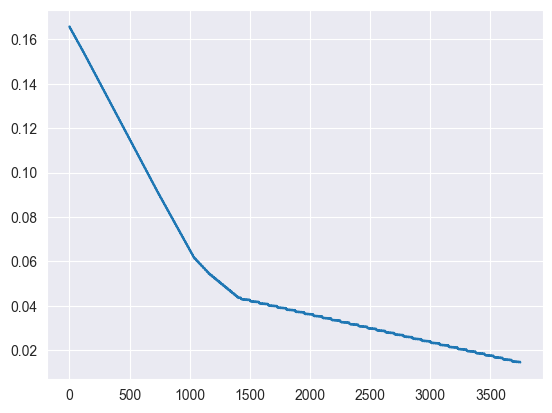

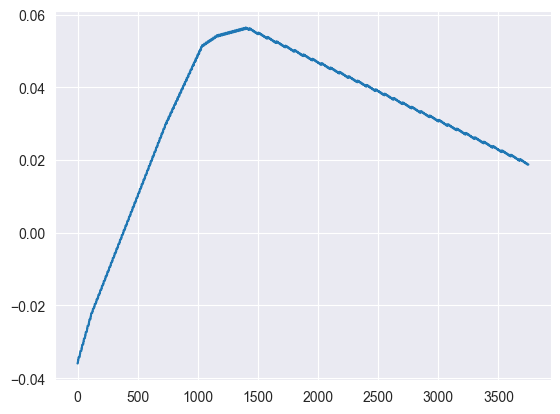

In [209]:
plt.plot(log_w0)
plt.show()
plt.plot(log_w1)
plt.show()

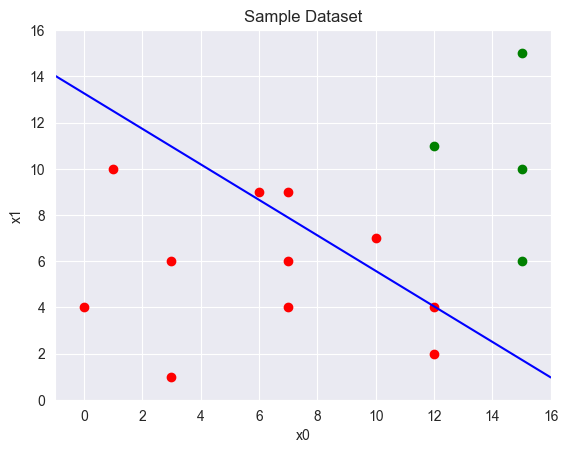

In [210]:
# all examples are classified correctly ... at least that is the goal

# how does the linear separation look like?

# let's have a look ...

plt.xlim(minx0-1,maxx0+1)
plt.ylim(minx1-1,maxx1+1)

# here we build the sepatation line

base = np.linspace(minx0-1,maxx0+1,10)
vals = [(((-w[0]/w[1])*(2.0*(i.astype(float)/maxx0.astype(float) - 0.5)))/2.0+0.5)*maxx1.astype(float) for i in base]

plt.plot(base,vals,color='blue')

plt.scatter(positives[:,0],positives[:,1], color = 'green')
plt.scatter(negatives[:,0],negatives[:,1], color = 'red')

plt.title('Sample Dataset')
plt.xlabel('x0')
plt.ylabel('x1')

plt.show()

Comparison: Library Function "Perceptron" (sklearn)


In [211]:
from sklearn.linear_model import Perceptron
p = Perceptron(eta0=learning_rate, max_iter=max_iterations)
p.fit(x,t)


Perceptron(eta0=0.001, max_iter=250)

In [212]:
p.score(x,t)

1.0